<a href="https://colab.research.google.com/github/behnaz-raiesie/Bank_Projetc/blob/main/BankAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

تحلیل داده های بانک
بهناز رئیسی


# 1 تحلیل مقدماتی داده ها

## 1.1 بررسی داده ها

(ساختار-تعداد ستون ها - نوع داده ها)
### 1 بارگذاری داده ها
داده ها از ریپازیتوری گیت هاب بارگذاری شدند
###2 بررسی ساختار داده ها
- تعداد سطرها: 45211
- تعداد ستون ها: 17
- داده ها از انواع عددی و متنی هستند.

### 3 بررسی Missing value
در بررسی اولیه مشخص شد که هیچ Missing value وجود ندارد.


In [ ]:
import pandas as pd
url  = "https://raw.githubusercontent.com/behnaz-raiesie/Bank_Projetc/refs/heads/main/data/bank-full.csv"
df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
print(df.shape)

(45211, 17)


In [ ]:
print(df.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [ ]:
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
print(df.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [ ]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [ ]:
print(df.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
df['education'].value_counts()

,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


In [ ]:
df['month'].value_counts()

,count
month,
may,13766
jul,6895
aug,6247
jun,5341
nov,3970
apr,2932
feb,2649
jan,1403
oct,738


## 1.2 شناسایی داده های گمشده و غیر منطقی
###1 شناسایی داده های گم شده
هیچ داده گمشده ای در هیچیک از ستون ها وجود ندارد.
###2 شناسایی مقادیر غیر منطقی
- در ستون balance تعداد 3766 مقدار منفی وجود دارد.
#### این مقادیر احتمالا نشان دهنده مشتریانی هستند که بدهی دارند.
-در ستونduration نیز تعداد ۳ مقدار صفر وجود دارد.


In [118]:
# تعداد داده های گمشده هر ستون
miss_val = df.isnull().sum()
miss_val

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [119]:
neg_balance = df[df['balance']<0]
neg_duration = df[df['duration']<=0]

neg_duration , neg_balance

(       age           job  marital  education default  balance housing loan  \
 6424    53    management  married    primary      no      351     yes   no   
 22937   35    technician  married  secondary      no     5535      no   no   
 36425   31  entrepreneur  married  secondary      no      162     yes  yes   
 
         contact  day month  duration  campaign  pdays  previous poutcome   y  
 6424    unknown   27   may         0         4     -1         0  unknown  no  
 22937  cellular   26   aug         0        15     -1         0  unknown  no  
 36425  cellular   11   may         0         2     -1         0  unknown  no  ,
        age          job   marital  education default  balance housing loan  \
 25      44       admin.   married  secondary      no     -372     yes   no   
 28      46   management    single  secondary      no     -246     yes   no   
 36      25  blue-collar   married  secondary      no       -7     yes   no   
 37      53   technician   married  secondary

In [120]:
neg_balance_count = neg_balance.shape[0]
neg_duration_count = neg_duration.shape[0]

neg_balance_count ,neg_duration_count

(3766, 3)

## 1.3 خلاصه سازی آماری داده ها
### ویژگی آماری داده ها بررسی می شود:
-  مقادیر میانگین و میانه
-  انحراف معیار (تشخیص پراکندگی داده ها )
-   min و max



در این بخش، تمام ستون‌هایی که داده‌های عددی دارند تحلیل شدند. این ستون‌ها عبارتند از:

- age
- balance
- day
- duration
- campaign
- pdays
- previous

برای هر کدام، مقادیر میانگین، میانه، انحراف معیار، حداقل، حداکثر و چارک‌ها بررسی شد.
###ستون‌هایی مانند `pdays` و `previous` نیز انحراف معیار بالایی دارند که نشان‌دهنده پراکندگی زیاد است.

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# 2 تحلیل داده ها

## 2.1 بررسی توزیع سن مشتریان

In [88]:
import matplotlib.pyplot as plt
plt.rcdefaults()


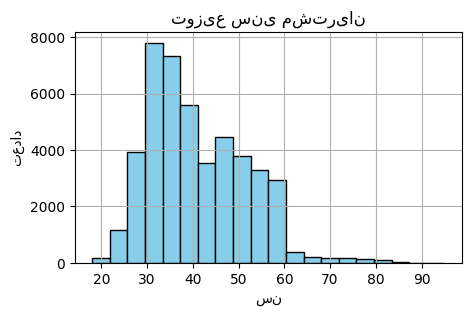

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.hist(df['age'], bins=20 , color='skyblue' , edgecolor='black')
plt.title('توزیع سنی مشتریان')
plt.xlabel('سن')
plt.ylabel('تعداد')
plt.grid(True)
plt.show()

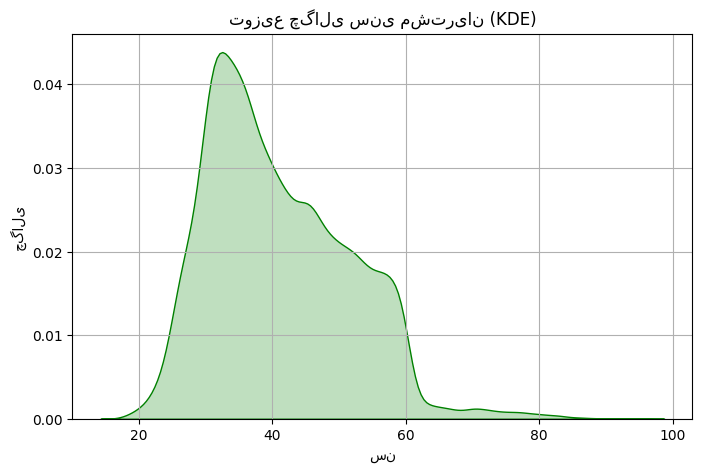

In [ ]:

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(df['age'], fill=True, color='green')
plt.title('توزیع چگالی سنی مشتریان (KDE)')
plt.xlabel('سن')
plt.ylabel('چگالی')
plt.grid(True)
plt.show()

## 2.2 تحلیل ارتباط بین شغل و وضعیت تأهل مشتریان

با استفاده از جدول فراوانی و نمودار ستونی، توزیع وضعیت تأهل مشتریان در شغل‌های مختلف بررسی شد.

- شغل‌هایی مانند "blue-collar" و "management" بیشترین تعداد افراد متأهل را دارند.
- در مقابل، شغل "student" تقریباً فقط شامل افراد مجرد است.
- در برخی شغل‌ها مانند "admin." و "services"، توزیع تأهل بین گروه‌ها متنوع‌تر است.


In [90]:
import pandas as pd

job_marital_table = pd.crosstab(df['job'], df['marital'])
print(job_marital_table)

marital        divorced  married  single
job                                     
admin.              750     2693    1728
blue-collar         750     6968    2014
entrepreneur        179     1070     238
housemaid           184      912     144
management         1111     5400    2947
retired             425     1731     108
self-employed       140      993     446
services            549     2407    1198
student               6       54     878
technician          925     4052    2620
unemployed          171      731     401
unknown              17      203      68


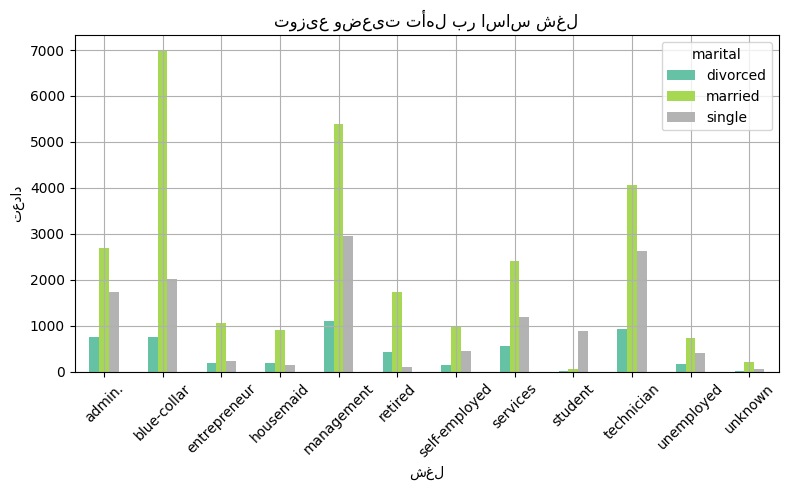

In [92]:

job_marital_table.plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title('توزیع وضعیت تأهل بر اساس شغل')
plt.xlabel('شغل')
plt.ylabel('تعداد')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## مرحله ۲.۳: تحلیل میانگین موجودی حساب بر اساس وام و وضعیت مسکن

در این بخش، میانگین موجودی حساب مشتریان بر اساس وضعیت وام و مسکن بررسی شد.

- میانگین موجودی حساب افراد دارای وام 774 می باشد  
- میانگین موجودی افراد فاقد وام 1474 می باشد  
→ این تفاوت نشان می‌دهد که داشتن وام با کاهش میانگین موجودی حساب همراه است.

- میانگین موجودی حساب افراد دارای مسکن 1175 می باشد  
- میانگین موجودی حساب افراد بدون مسکن: 1596 می باشد  
→ افراد فاقد مسکن به طور میانگین موجودی بیشتری دارند.

این نتایج می‌تواند برای بخش بازاریابی بانک جهت هدف‌گذاری بهتر مشتریان و پیشنهادات مالی سفارشی مفید باشد.

In [95]:
loan_balance = df.groupby('loan')['balance'].mean()
print(loan_balance)

loan
no     1474.453631
yes     774.309912
Name: balance, dtype: float64


In [93]:
housing_balance = df.groupby('housing')['balance'].mean()
print(housing_balance)

housing
no     1596.501270
yes    1175.103064
Name: balance, dtype: float64


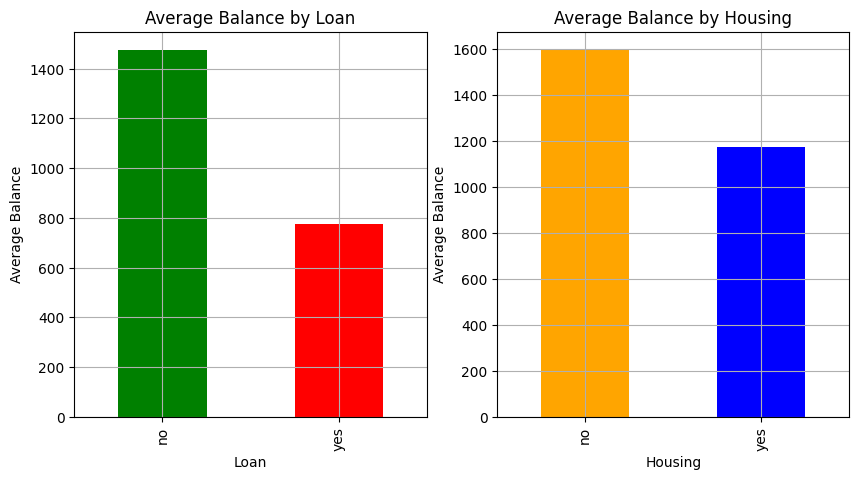

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 ردیف، 2 ستون

loan_balance.plot(kind='bar', color=['green', 'red'], ax=axes[0])
axes[0].set_title('Average Balance by Loan')
axes[0].set_xlabel('Loan')
axes[0].set_ylabel('Average Balance')
axes[0].grid(True)

# نمودار دوم - مسکن
housing_balance.plot(kind='bar', color=['orange', 'blue'], ax=axes[1])
axes[1].set_title('Average Balance by Housing')
axes[1].set_xlabel('Housing')
axes[1].set_ylabel('Average Balance')
axes[1].grid(True)

# plt.tight_layout()
plt.show()

## مرحله ۲.۴: بررسی تعداد تماس‌ها در روزها و ماه‌های مختلف

### تماس در روزهای ماه:
بیشترین تماس‌ها در روزهای میانی هر ماه انجام شده‌اند، به‌ویژه روزهای 15 تا 20. این موضوع می‌تواند نشان دهد که استراتژی بانک در میانه‌ ماه فعال‌تر بوده است.

### تماس در ماه‌های سال:
- بیشترین تماس در ماه May انجام شده (حدود 13766 تماس).
- ماه‌های Jul (6895 تماس) و Aug (6247 تماس) نیز تماس‌های بالایی داشته‌اند.
- تماس‌ها در ماه‌هایی مثل Dec، Sep، Mar بسیار پایین‌تر بوده‌اند.

این اطلاعات می‌تواند به تیم بازاریابی کمک کند تا زمان‌های مؤثرتر برای تماس با مشتریان را شناسایی و کمپین‌ها را بهینه کنند.

In [112]:

day_counts = df['day'].value_counts().sort_index()
print(day_counts)

day
1      322
2     1293
3     1079
4     1445
5     1910
6     1932
7     1817
8     1842
9     1561
10     524
11    1479
12    1603
13    1585
14    1848
15    1703
16    1415
17    1939
18    2308
19    1757
20    2752
21    2026
22     905
23     939
24     447
25     840
26    1035
27    1121
28    1830
29    1745
30    1566
31     643
Name: count, dtype: int64


In [113]:

month_counts = df['month'].value_counts().loc[
    ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
]
print(month_counts)

month
jan     1403
feb     2649
mar      477
apr     2932
may    13766
jun     5341
jul     6895
aug     6247
sep      579
oct      738
nov     3970
dec      214
Name: count, dtype: int64


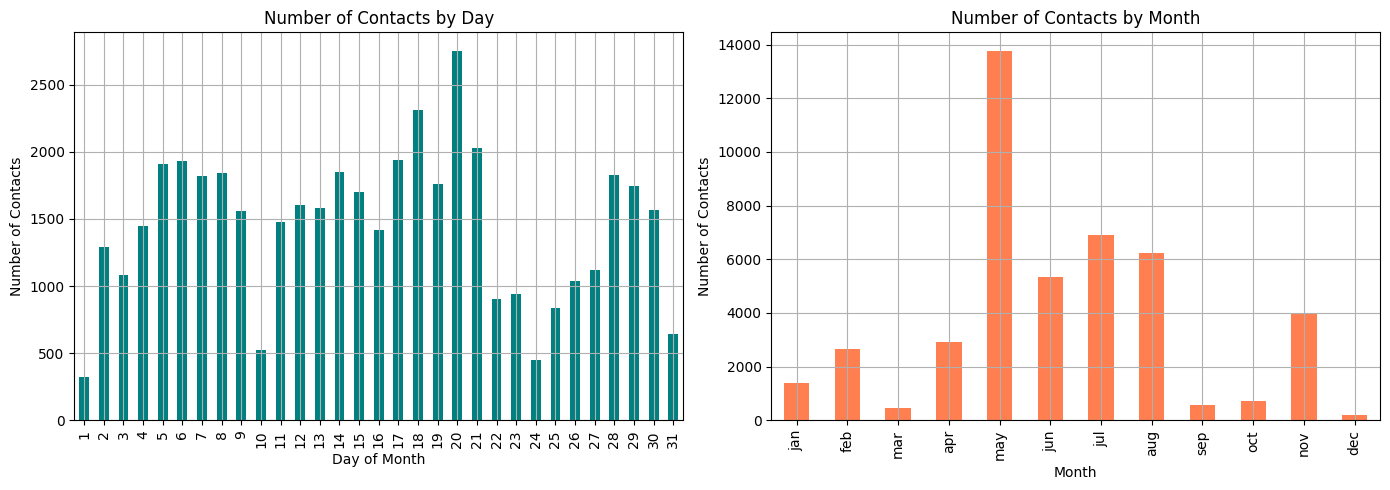

In [114]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# روزهای ماه
day_counts.plot(kind='bar', ax=axes[0], color='teal')
axes[0].set_title('Number of Contacts by Day')
axes[0].set_xlabel('Day of Month')
axes[0].set_ylabel('Number of Contacts')
axes[0].grid(True)

# ماه‌های سال
month_counts.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Number of Contacts by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Contacts')
axes[1].grid(True)

plt.tight_layout()
plt.show()